### 5.6.1 Affine 계층
신경망의 순전파에서는 가중치 신호의 총합($Y=XW+B$)을 계산하기 때문에 행렬의 곱(내적; `np.dot()`)을 사용했다. 이때 행렬의 차원이 서로 맞아야 $XW$를 계산할 수 있는데, 예를 들어 다음과 같아야 한다.  

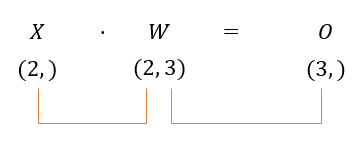  
  
이처럼 신경망의 순전파 때 수행하는 내적을 기하학에서는 **어파인 변환(affine transformation)**이라고 한다. 그럼 가중치 신호의 총합을 계산하는 과정(`np.dot(X, W) + B`)을 계산 그래프로 그려보자.  

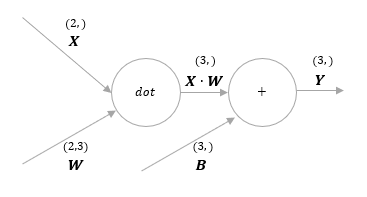

간단한 그래프이지만, 여기서의 $X, W, B$는 모두 **행렬(다차원 배열)이란 점에 주의**하자.  

다차원 배열에서의 역전파를 이해하기 위해서는 다음과 같은 행렬의 미분을 알아야 한다. 아래 식은 역전파에서 입력 $X$에 대한 loss function $L$의 변화와 가중치 $W$에 대한 loss function $L$의 변화를 뜻한다.
  
  
\begin{align}
\frac{\partial L}{\partial X} &= \frac{\partial L}{\partial Y} \cdot W^T \\
\frac{\partial L}{\partial W} &= X^T \cdot \frac{\partial L}{\partial Y}
\end{align}  

행렬 $X$(2x2)와 $W$(2x3)가 있을 때 그들의 dot product $Y$는 다음과 같다. 여기서 $x_{ij}$와 $w_{ij}$는 각각 행렬 $X$, $W$의 $i,j$번째 원소이다.   

\begin{equation}
Y = X \cdot W = 
\begin{pmatrix} 
x_{11}w_{11} + x_{12}w_{21} & x_{11}w_{12} + x_{12}w_{22} & x_{11}w_{13} + x_{12}w_{23}  \\ 
x_{21}w_{11} + x_{22}w_{21} & x_{21}w_{12} + x_{22}w_{22} & x_{21}w_{13} + x_{22}w_{23}
\end{pmatrix}
\end{equation}  
　  
   
여기서 입력과 가중치에 각각에 대한 loss function $L$의 미분을 구하기 위해 연쇄 법칙에 따라 식 (4), (5)와 같이 쓸 수 있다.  

\begin{align}
\frac{\partial L}{\partial X} &= \frac{\partial L}{\partial Y} \frac{\partial Y}{\partial X} \\
\frac{\partial L}{\partial W} &= \frac{\partial L}{\partial Y} \frac{\partial Y}{\partial W}
\end{align}  
  
여기서, $L$은 스칼라, $Y$는 행렬이기 때문에 $\frac{\partial L}{\partial Y}$은 $Y$와 동일한 shape을 가지는 다음과 같은 행렬이다.  

$$\frac{\partial L}{\partial Y} = \begin{pmatrix} 
\frac{\partial L}{\partial y_{11}} & \frac{\partial L}{\partial y_{12}} & \frac{\partial L}{\partial y_{13}} \\
\frac{\partial L}{\partial y_{21}} & \frac{\partial L}{\partial y_{22}} & \frac{\partial L}{\partial y_{23}}
\end{pmatrix} $$  
  
  
먼저 식 (1)을 증명해보자. 위와 마찬가지로, $X$에 대한 $L$의 미분의 경우도 $L$은 스칼라, $X$는 행렬이기 때문에 그 결과는 $X$와 동일한 shape을 가지는 다음과 같은 행렬이다.  

$$\frac{\partial L}{\partial X} = \begin{pmatrix} 
\frac{\partial L}{\partial x_{11}} & \frac{\partial L}{\partial x_{12}} & \frac{\partial L}{\partial x_{13}} \\
\frac{\partial L}{\partial x_{21}} & \frac{\partial L}{\partial x_{22}} & \frac{\partial L}{\partial x_{23}}
\end{pmatrix} $$  
  
이때, $X$의 (1,1)번째 원소 $x_{11}$에 대해 살펴보자. 연쇄 법칙에 의해 다음과 같은 사실을 알고 있다(**$\frac{\partial L}{\partial Y}\frac{\partial Y}{\partial x_{11}}$는 sum을 표기하기 쉽게 하기 위함, 따라서 아래의 식(7)에서는 각 원소별 곱해서 더함**). 

$$\frac{\partial L}{\partial x_{11}} = \sum_{i=1}^{N} \sum_{j=1}^M {\frac{\partial L}{\partial y_{ij}} \cdot \frac{\partial y_{ij}}{\partial x_{11}}} = \frac{\partial L}{\partial Y} \frac{\partial Y}{\partial x_{11}}$$  
  
위 식에서, $L$과 $x_{11}$은 스칼라이기 때문에 $\frac{\partial L}{\partial x_{11}}$의 결과도 스칼라가 나와야 한다. 역전파에서 앞 노드에서 이미 $\frac{\partial L}{\partial Y}$가 주어졌기 때문에, 위 식을 계산하기 위해 필요한 것은 $\frac{\partial Y}{\partial x_{11}}$뿐이다. $\frac{\partial Y}{\partial x_{11}}$는 식 (3)로부터 얻을 수 있다.  

\begin{equation}
\frac{\partial Y}{\partial x_{11}}= \begin{pmatrix}
w_{11} & w_{12} & w_{13} \\
0 & 0 & 0
\end{pmatrix}
\end{equation}  
  
따라서, $\frac{\partial L}{\partial x_{11}}$는 최종적으로 다음과 같다.(표기를 쉽게 하기 위해 행렬처럼 모아서 표기)  

\begin{equation}
\begin{aligned}
\frac{\partial L}{\partial x_{11}} &= \frac{\partial L}{\partial Y}\frac{\partial Y}{\partial x_{11}} \\
&= \begin{pmatrix}
\frac{\partial L}{\partial y_{11}} & \frac{\partial L}{\partial y_{12}} & \frac{\partial L}{\partial y_{13}} \\
\frac{\partial L}{\partial y_{21}} & \frac{\partial L}{\partial y_{22}} & \frac{\partial L}{\partial y_{23}}
\end{pmatrix} \cdot \begin{pmatrix}
w_{11} & w_{12} & w_{13} \\
0 & 0 & 0
\end{pmatrix} \\
&= \frac{\partial L}{\partial y_{11}}w_{11} + \frac{\partial L}{\partial y_{12}} w_{12} + \frac{\partial L}{\partial y_{13}} w_{13}
\end{aligned}
\end{equation}  

위 과정을 $X$의 각각의 원소에 대해 반복하면 식 (8)을 얻을 수 있다.  

\begin{equation}
\begin{aligned}
\frac{\partial L}{\partial X} &= \begin{pmatrix}
\frac{\partial L}{\partial y_{11}}w_{11} + \frac{\partial L}{\partial y_{12}} w_{12} + \frac{\partial L}{\partial y_{13}} w_{13} &
\frac{\partial L}{\partial y_{11}}w_{21} + \frac{\partial L}{\partial y_{12}} w_{22} + \frac{\partial L}{\partial y_{13}} w_{23} \\
\frac{\partial L}{\partial y_{21}}w_{11} + \frac{\partial L}{\partial y_{22}} w_{12} + \frac{\partial L}{\partial y_{23}} w_{13} &
\frac{\partial L}{\partial y_{21}}w_{21} + \frac{\partial L}{\partial y_{22}} w_{22} + \frac{\partial L}{\partial y_{23}} w_{23}
\end{pmatrix} \\
&= \begin{pmatrix}
\frac{\partial L}{\partial y_{11}} & \frac{\partial L}{\partial y_{12}} & \frac{\partial L}{\partial y_{13}} \\
\frac{\partial L}{\partial y_{21}} & \frac{\partial L}{\partial y_{22}} & \frac{\partial L}{\partial y_{23}}
\end{pmatrix} \begin{pmatrix}
w_{11} & w_{21} \\ 
w_{12} & w_{22} \\
w_{13} & w_{23}
\end{pmatrix} \\
&= \frac{\partial L}{\partial Y} W^T
\end{aligned}
\end{equation}  
  
동일한 방법으로 식 (2)도 증명할 수 있다.